# 格式转换及因子处理预备
时间格式需要转换为alphalens需要的%Y-%m-%d %H:%M:%S%z  
因子处理中行业市值中心化需要行业df和市值df作为输入  
alphalens需要price作为输入

In [5]:
import pandas as pd
def time_transfer(df):
    # 将datetime对象格式化为%Y-%m-%d %H:%M:%S%z
    df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
    df['trade_date'] = df['trade_date'].dt.strftime('%Y-%m-%d 00:00:00+00:00')
    return df

In [6]:
# 构造industry df
basic = pd.read_pickle('stock_basic.pkl')
industry = basic.set_index('ts_code')['industry_l1'].to_frame().T
industry.to_pickle('industry.pkl')
industry.iloc[:,:5]

ts_code,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000007.SZ
industry_l1,480000,430000,710000,430000,450000


In [ ]:
# 构造market_value df
value = pd.read_pickle('stock_value.pkl')
value = time_transfer(value)
size = value.set_index(['trade_date', 'ts_code'])['circ_mv'].unstack()
size.to_pickle('market_value.pkl')
value.to_pickle('stock_value.pkl')
size.head()

ts_code,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,...,920111.BJ,920116.BJ,920118.BJ,920128.BJ,920167.BJ,920445.BJ,920489.BJ,920682.BJ,920799.BJ,920819.BJ
trade_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,2.317765e+07,3.161304e+07,185340.8701,NaN,NaN,1.763685e+06,1.551905e+06,286149.9809,300373.3652,1.301106e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,2.255168e+07,3.138973e+07,197453.5679,NaN,NaN,1.759662e+06,1.573106e+06,288760.8384,301428.5410,1.341860e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04 00:00:00+00:00,2.241634e+07,3.215675e+07,192807.6016,NaN,NaN,1.745585e+06,1.619748e+06,286149.9809,301604.4036,1.320728e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 00:00:00+00:00,2.250093e+07,3.374906e+07,192309.8195,NaN,NaN,1.719442e+06,1.600667e+06,294504.7249,315673.4137,1.316200e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08 00:00:00+00:00,2.192571e+07,3.494329e+07,189489.0543,NaN,NaN,1.703353e+06,1.594307e+06,323746.3288,314442.3753,1.343369e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 构造price df （日收盘价）
close = pd.read_pickle('stock_kline.pkl')
close = time_transfer(close)
price = close.set_index(['trade_date', 'ts_code'])['close']
price.to_pickle('price.pkl')
close.to_pickle('stock_kline.pkl')
price.head()

In [ ]:
del close, value, basic

# 因子构建

- mmt_intraday_M
   - 名称：1个月日内动量
   - 计算方式：过去一个月的日内涨跌幅之和
   - 逻辑：收益率中日内涨跌幅可能蕴含与日度收益率不同的信息特征，业界认为A股中日内收益率包含日度收益率中的“反转”成份。
- mmt_normal_M
   - 名称：1个月收益率
   - 计算方式：过去1个月收益率
   - 逻辑：最近一个月的收益率更多体现了散户投资者对于近期信息的过度反映。
- mmt_overnight_M
   - 名称：1个月隔夜动量
   - 计算方式：过去一个月的隔夜涨跌幅之和
   - 逻辑：收益率中隔夜涨跌幅可能蕴含与日度收益率不同的信息特征，业界认为A股中隔夜收益率包含日度收益率中的“动量”成份。
- liq_turn_std_1M
   - 名称：1个月换手率标准差
   - 计算方式：1个月换手率的标准差
   - 逻辑：表示中低频流动性，流动性越差的因子往往收益率更高。

In [1]:
import pandas as pd
kline = pd.read_pickle('stock_kline.pkl')
kline.head()

ImportError: DLL load failed while importing _multiarray_umath: 找不到指定的模块。

ImportError: DLL load failed while importing _multiarray_umath: 找不到指定的模块。

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2025-04-30 00:00:00+00:00,10.96,10.97,10.89,10.91,10.98,-0.07,-0.6375,869834.92,949911.030
1,000002.SZ,2025-04-30 00:00:00+00:00,6.70,6.82,6.63,6.81,6.81,0.00,0.0000,924542.24,625457.245
2,000004.SZ,2025-04-30 00:00:00+00:00,7.97,7.97,7.97,7.97,8.39,-0.42,-5.0060,1441.00,1148.477
3,000006.SZ,2025-04-30 00:00:00+00:00,6.30,6.49,6.30,6.35,6.26,0.09,1.4377,231581.53,147949.921
4,000007.SZ,2025-04-30 00:00:00+00:00,6.80,6.89,6.68,6.72,6.82,-0.10,-1.4663,99360.43,67176.319


### mmt_intraday_M

In [2]:
# 计算日内涨跌幅
kline['intraday_pct_chg'] = (kline['close'] - kline['open']) / kline['open'] * 100

# 使用groupby和rolling计算过去20天的日内涨跌幅之和
kline['mmt_intraday_M'] = kline.groupby('ts_code')['intraday_pct_chg'].rolling(window=20, min_periods=1).sum().reset_index(0, drop=True)
mmt_intraday_M = kline[['trade_date','ts_code','mmt_intraday_M']]

In [3]:
mmt_intraday_M = mmt_intraday_M.set_index(['trade_date', 'ts_code'])['mmt_intraday_M'].unstack()
mmt_intraday_M.head()

ts_code,000001.SZ,000002.SZ,000004.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,...,920111.BJ,920116.BJ,920118.BJ,920128.BJ,920167.BJ,920445.BJ,920489.BJ,920682.BJ,920799.BJ,920819.BJ
trade_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,5.345204,24.881717,0.137271,NaN,NaN,-2.771828,-3.230038,3.347757,8.371235,12.534198,...,NaN,NaN,NaN,NaN,NaN,5.021286,NaN,NaN,NaN,7.317938
2018-01-03 00:00:00+00:00,2.358518,17.036516,-0.087045,NaN,NaN,-2.879188,-4.068625,-3.157819,6.317955,6.962044,...,NaN,NaN,NaN,NaN,NaN,NaN,1.410159,NaN,NaN,8.037363
2018-01-04 00:00:00+00:00,8.580670,20.154512,-11.228152,NaN,NaN,-2.165701,-9.664353,-9.244731,3.857564,2.778865,...,NaN,NaN,NaN,NaN,NaN,5.021286,3.579030,NaN,NaN,NaN
2018-01-05 00:00:00+00:00,9.679672,19.055611,-10.459369,NaN,NaN,-2.795256,-18.178337,-14.821077,0.295531,-0.789061,...,NaN,NaN,NaN,NaN,4.690851,5.021286,-2.098188,NaN,NaN,NaN
2018-01-08 00:00:00+00:00,10.004840,16.069360,-8.190742,NaN,NaN,-3.375800,-16.535577,-17.052712,-4.865472,1.039628,...,NaN,NaN,NaN,NaN,2.705739,2.412590,-3.310440,NaN,NaN,6.073077


In [ ]:
from process import process
market_value = pd.read_pickle('market_value.pkl')
industry = pd.read_pickle('industry.pkl')
mmt_intraday_M = process(mmt_intraday_M,market_value,industry)

winsorize begins...


100%|██████████| 1777/1777 [00:09<00:00, 179.36it/s]


winsorize finished!
standardize begins...


100%|██████████| 1777/1777 [00:18<00:00, 97.95it/s] 


standardize finished!
neutralize begins...


Processing dates: 100%|██████████| 1777/1777 [00:49<00:00, 35.71it/s]


neutralize finished!
因子处理完成
处理后因子数据形状: (1777, 5411)


In [ ]:
mmt_intraday_M = mmt_intraday_M.stack().reset_index()
mmt_intraday_M.columns = ['trade_date', 'ts_code', 'mmt_intraday_M']  # 设置列名
mmt_intraday_M = mmt_intraday_M.set_index(['trade_date', 'ts_code'])
mmt_intraday_M.to_pickle('mmt_intraday_M.pkl')
mmt_intraday_M.head()

mmt_intraday_M
trade_date                ts_code                  
2018-01-02 00:00:00+00:00 000001.SZ        0.177095
                          000002.SZ        2.352772
                          000004.SZ       -0.247891
                          000008.SZ       -0.656004
                          000009.SZ       -0.703636

### mmt_normal_M

In [ ]:
import pandas as pd
# 计算收盘收益率
kline = pd.read_pickle('stock_kline.pkl')
kline['close_return'] = (kline['close'] - kline['pre_close']) / kline['pre_close']
# 按ts_code分组并滚动计算20天累计收益率
kline['mmt_normal_M'] = kline.groupby('ts_code')['close_return'].rolling(
    window=20, min_periods=20  # 确保至少有20天数据
).apply(lambda x: (1 + x).prod() - 1, raw=True).reset_index(0, drop=True)

mmt_normal_M = kline[['trade_date','ts_code','mmt_normal_M']]
mmt_normal_M = mmt_normal_M.set_index(['trade_date', 'ts_code'])['mmt_normal_M'].unstack()
from process import process
market_value = pd.read_pickle('market_value.pkl')
industry = pd.read_pickle('industry.pkl')
mmt_normal_M = process(mmt_normal_M,market_value,industry)
mmt_normal_M = mmt_normal_M.stack().reset_index()
mmt_normal_M.columns = ['trade_date', 'ts_code', 'mmt_normal_M']  # 设置列名
mmt_normal_M = mmt_normal_M.set_index(['trade_date', 'ts_code'])
mmt_normal_M.to_pickle('mmt_normal_M.pkl')
mmt_normal_M.head()

winsorize begins...


 98%|█████████▊| 1742/1777 [00:09<00:00, 244.56it/s]d:\Downloads\Anaconda\envs\MDS5724\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Downloads\Anaconda\envs\MDS5724\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1777/1777 [00:09<00:00, 187.88it/s]


winsorize finished!
standardize begins...


100%|██████████| 1777/1777 [00:17<00:00, 103.36it/s]


standardize finished!
neutralize begins...


Processing dates: 100%|██████████| 1777/1777 [01:37<00:00, 18.24it/s]


neutralize finished!
因子处理完成
处理后因子数据形状: (1777, 5411)


mmt_normal_M
trade_date                ts_code                
2018-01-02 00:00:00+00:00 000001.SZ     -0.015457
                          000002.SZ      1.834403
                          000004.SZ     -0.346119
                          000008.SZ     -0.752773
                          000009.SZ     -1.059606

### mmt_overnight_M

In [4]:
import pandas as pd
# 计算隔夜收益率
kline = pd.read_pickle('stock_kline.pkl')
kline['overnight_pct_chg'] = (kline['open'] - kline['pre_close']) / kline['pre_close'] * 100
# 使用groupby和rolling计算过去20天的隔夜涨跌幅之和
kline['mmt_overnight_M'] = kline.groupby('ts_code')['overnight_pct_chg'].rolling(window=20, min_periods=1).sum().reset_index(0, drop=True)

mmt_overnight_M = kline[['trade_date','ts_code','mmt_overnight_M']]
mmt_overnight_M = mmt_overnight_M.set_index(['trade_date', 'ts_code'])['mmt_overnight_M'].unstack()
from process import process
market_value = pd.read_pickle('market_value.pkl')
industry = pd.read_pickle('industry.pkl')
mmt_overnight_M = process(mmt_overnight_M,market_value,industry)
mmt_overnight_M = mmt_overnight_M.stack().reset_index()
mmt_overnight_M.columns = ['trade_date', 'ts_code', 'mmt_overnight_M']  # 设置列名
mmt_overnight_M = mmt_overnight_M.set_index(['trade_date', 'ts_code'])
mmt_overnight_M.to_pickle('mmt_overnight_M.pkl')
mmt_overnight_M.head()

winsorize begins...


100%|██████████| 1777/1777 [00:09<00:00, 194.19it/s]


winsorize finished!
standardize begins...


100%|██████████| 1777/1777 [00:16<00:00, 107.28it/s]


standardize finished!
neutralize begins...


Processing dates: 100%|██████████| 1777/1777 [00:46<00:00, 38.11it/s]


neutralize finished!
因子处理完成
处理后因子数据形状: (1777, 5411)


mmt_overnight_M
trade_date                ts_code                   
2018-01-02 00:00:00+00:00 000001.SZ        -0.149120
                          000002.SZ        -0.292985
                          000004.SZ        -0.232043
                          000008.SZ        -0.121851
                          000009.SZ        -0.608106

### liq_turn_std_1M

In [59]:
import pandas as pd
# 计算换手率标准差
value = pd.read_pickle('stock_value.pkl')
value['liq_turn_std_1M'] = value.groupby('ts_code')['turnover_rate_f'].rolling(window=20, min_periods=1).std().reset_index(0, drop=True)

liq_turn_std_1M = value[['trade_date','ts_code','liq_turn_std_1M']]
liq_turn_std_1M = liq_turn_std_1M.set_index(['trade_date', 'ts_code'])['liq_turn_std_1M'].unstack()
from process import process
market_value = pd.read_pickle('market_value.pkl')
industry = pd.read_pickle('industry.pkl')
liq_turn_std_1M = process(liq_turn_std_1M,market_value,industry)
liq_turn_std_1M = liq_turn_std_1M.stack().reset_index()
liq_turn_std_1M.columns = ['trade_date', 'ts_code', 'liq_turn_std_1M']  # 设置列名
liq_turn_std_1M = liq_turn_std_1M.set_index(['trade_date', 'ts_code'])
liq_turn_std_1M.to_pickle('liq_turn_std_1M.pkl')
liq_turn_std_1M.head()

winsorize begins...


100%|██████████| 1776/1776 [00:10<00:00, 161.92it/s]


winsorize finished!
standardize begins...


100%|██████████| 1776/1776 [00:25<00:00, 68.51it/s]


standardize finished!
neutralize begins...


Processing dates: 100%|██████████| 1776/1776 [01:02<00:00, 28.47it/s]


neutralize finished!
因子处理完成
处理后因子数据形状: (1776, 5411)


liq_turn_std_1M
trade_date                ts_code                   
2018-01-02 00:00:00+00:00 000001.SZ         0.428445
                          000002.SZ         0.077350
                          000004.SZ        -0.656380
                          000008.SZ        -0.837845
                          000009.SZ        -0.268685

# merge factors

In [60]:
import pandas as pd
mmt_intraday_M = pd.read_pickle('mmt_intraday_M.pkl')
mmt_normal_M = pd.read_pickle('mmt_normal_M.pkl')
mmt_overnight_M = pd.read_pickle('mmt_overnight_M.pkl')
liq_turn_std_1M = pd.read_pickle('liq_turn_std_1M.pkl')
factors = pd.concat([mmt_intraday_M,mmt_normal_M,mmt_overnight_M,liq_turn_std_1M],axis=1)
factors.columns = ['mmt_intraday_M','mmt_normal_M','mmt_overnight_M','liq_turn_std_1M']
factors = factors.dropna(axis=0) 
factors.tail()

mmt_intraday_M  mmt_normal_M  \
trade_date                ts_code                                   
2025-04-02 00:00:00+00:00 920445.BJ        1.251770      1.931079   
                          920489.BJ        0.681739     -0.101613   
                          920682.BJ        0.235226     -0.571577   
                          920799.BJ        0.183636      0.977289   
                          920819.BJ        2.371903      2.310802   

                                     mmt_overnight_M  liq_turn_std_1M  
trade_date                ts_code                                      
2025-04-02 00:00:00+00:00 920445.BJ         1.222450         1.466973  
                          920489.BJ        -0.851434         1.693658  
                          920682.BJ        -0.735478         1.009864  
                          920799.BJ         1.188428         2.071282  
                          920819.BJ        -0.484697         1.383255

In [61]:
# 计算因子相关系数
factors.corr()

,mmt_intraday_M,mmt_normal_M,mmt_overnight_M,liq_turn_std_1M
mmt_intraday_M,1.000000,0.823706,-0.322431,0.369388
mmt_normal_M,0.823706,1.000000,0.214564,0.232878
mmt_overnight_M,-0.322431,0.214564,1.000000,-0.213000
liq_turn_std_1M,0.369388,0.232878,-0.213000,1.000000


# 因子回测

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from sklearn.preprocessing import RobustScaler
from pathlib import Path
import traceback
import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
price = pd.read_pickle('price.pkl')
price = price.to_frame(name='close')
price = price.sort_index(level=0)
price['returns'] = price.groupby('ts_code')['close'].pct_change(-1) # 未来一天的收益率
price = price.dropna(subset=['returns'])  # 去除收益率计算中因首日无变化导致的NaN值
price

close   returns
trade_date                ts_code                   
2018-01-02 00:00:00+00:00 000001.SZ  13.70  0.027757
                          000002.SZ  32.56  0.007114
                          000004.SZ  22.34 -0.061345
                          000008.SZ   8.77  0.002286
                          000009.SZ   7.32 -0.013477
...                                    ...       ...
2025-04-29 00:00:00+00:00 920445.BJ   9.69 -0.034861
                          920489.BJ  22.61 -0.030030
                          920682.BJ  11.88 -0.005858
                          920799.BJ  56.30 -0.022569
                          920819.BJ   4.27  0.011848

[7696174 rows x 2 columns]

In [ ]:
class Backtester:
    """因子回测分析模块"""
    
    def __init__(self, factors, price_data):
        """
        参数:
        factors : 生成的因子矩阵 (DataFrame)
        price_data : 包含收益率的原始数据 (DataFrame)
        """
        self.factors = factors.copy()
        self.returns = price_data['returns'].reindex(factors.index)
        self.factor_returns = None
        
    def run_backtest(self):
        """执行完整回测流程"""
        print("\n 开始回测分析...")
        self._calculate_factor_returns()
        sharpe_ratios = self._calculate_sharpe_ratios()
        cumulative_returns = self._calculate_cumulative_returns()
        
        # 生成报告
        report = pd.DataFrame({
            'Sharpe': sharpe_ratios,
            'Cumulative_Return': cumulative_returns
        })
        
        # 可视化结果
        self._plot_results(cumulative_returns)
        return report

    def _calculate_factor_returns(self):
        """改进的收益率计算"""
        valid_dates = self.returns.index.intersection(self.factors.index)
        self.factor_returns = self.factors.loc[valid_dates].multiply(
            self.returns.loc[valid_dates], axis=0
        )
        
        # 异常值过滤
        self.factor_returns = self.factor_returns.clip(
            lower=self.factor_returns.quantile(0.01),
            upper=self.factor_returns.quantile(0.99),
            axis=1
        )

    def _calculate_sharpe_ratios(self):
        """计算年化夏普比率"""
        annual_factor = np.sqrt(252)  # 年化系数
        mean_returns = self.factor_returns.mean()
        std_returns = self.factor_returns.std()
        return (mean_returns / std_returns) * annual_factor

    def _calculate_cumulative_returns(self):
        """计算累计收益率"""
        return (1 + self.factor_returns).cumprod().iloc[-1] - 1

    def _plot_results(self, cumulative_returns):
        """改进的可视化方法"""
        plt.figure(figsize=(14, 6))
        plt.subplots_adjust(top=0.85, wspace=0.3)  # 调整布局
        
        # 左图：累计收益率
        plt.subplot(1, 2, 1)
        sns.barplot(
            x=cumulative_returns.index, 
            y=cumulative_returns.values,
            palette="viridis"
        )
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.title('因子累计收益率', fontsize=10, pad=20)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
        
        # 右图：净值曲线
        plt.subplot(1, 2, 2)
        cum_net = (self.factor_returns + 1).cumprod()
        for col in cum_net.columns:
            plt.plot(cum_net[col], alpha=0.7, label=col ,  linewidth=1.5)
        plt.title('因子净值曲线', fontsize=10, pad=20)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        
        plt.suptitle('因子绩效分析报告', fontsize=12, y=0.95)
        plt.savefig('factor_performance.png', dpi=300, bbox_inches='tight')


 开始回测分析...


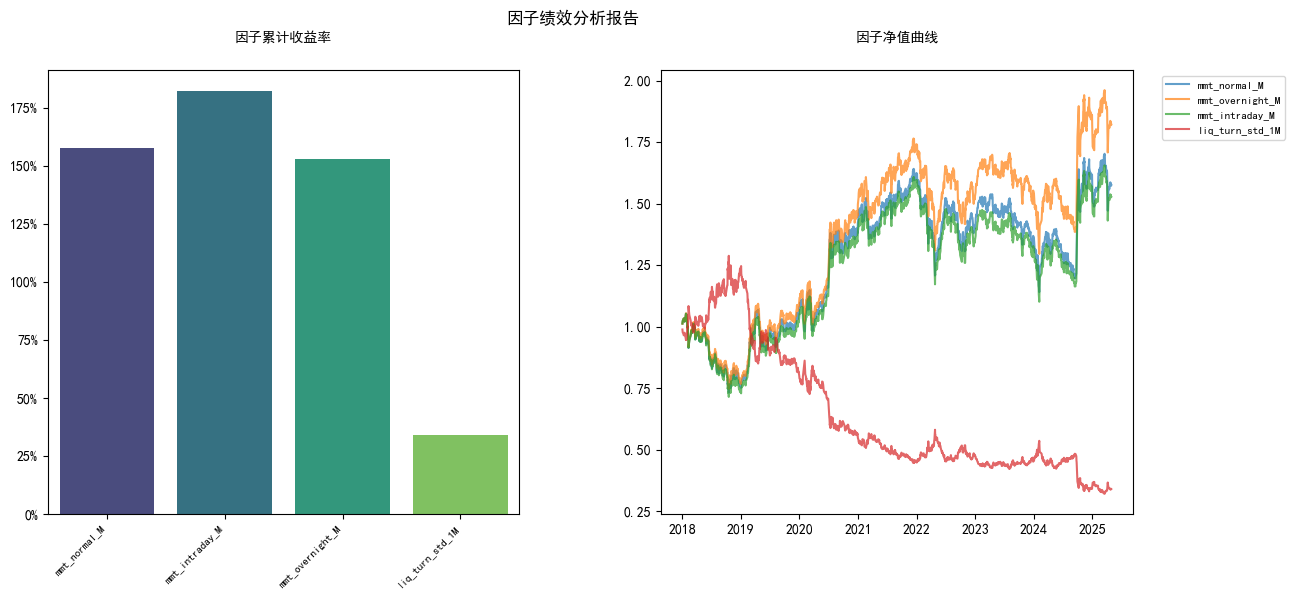

In [69]:
backtester = Backtester(factors, price)
backtest_report = backtester.run_backtest()

In [70]:
backtest_report

,Sharpe,Cumulative_Return
0,1.3513,1.576368
1,1.6561,1.821583
2,0.7461,1.527560
3,-0.6311,0.339818
